# ETALA-2016Q3eksamen

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

sp.init_printing()

def sp_to_np(matrix):
    return np.array(matrix.tolist()).astype(float)

def np_to_sp(matrix):
    return sp.Matrix(matrix)

def draw(points, adjancency):
    for i, col in enumerate(np.transpose(adjancency)):
        for j, row in enumerate(col):
            if row == 1:
                x_start, y_start, ex = points[i,:].T
                x_end, y_end, ex = points[j,:].T
                path = np.array([
                    [x_start, y_start],
                    [x_end, y_end]
                ])
                x, y = path.T
                plt.plot(x,y, color="blue")

## Opgave 1

In [2]:
c = sp.symbols("c")

A = sp.Matrix([
    [1,2,-1],
    [0,-1,1],
    [-2,3,1]
])

b = sp.Matrix([7, -3, c])

In [3]:
Abc1 = A.row_join(b).subs(c, 1)
Abc1

⎡1   2   -1  7 ⎤
⎢              ⎥
⎢0   -1  1   -3⎥
⎢              ⎥
⎣-2  3   1   1 ⎦

In [4]:
res = Abc1.rref()[0]
res

⎡1  0  0  2 ⎤
⎢           ⎥
⎢0  1  0  2 ⎥
⎢           ⎥
⎣0  0  1  -1⎦

In [5]:
x = res.col(3)
x

⎡2 ⎤
⎢  ⎥
⎢2 ⎥
⎢  ⎥
⎣-1⎦

The problem can be solved by any b, as A has pivots in all the rows. This also says that c could be any value

## Opgave 2

In [6]:
A = sp.Matrix([
    [1,4],
    [1,2]
])
A

⎡1  4⎤
⎢    ⎥
⎣1  2⎦

In [7]:
AI = A.row_join(sp.eye(2,2))
AI

⎡1  4  1  0⎤
⎢          ⎥
⎣1  2  0  1⎦

In [8]:
AI[1,:] = AI.row(1) - AI.row(0)
AI

⎡1  4   1   0⎤
⎢            ⎥
⎣0  -2  -1  1⎦

In [9]:
AI[1,:] = -AI.row(1)/2
AI

⎡1  4   1    0  ⎤
⎢               ⎥
⎣0  1  1/2  -1/2⎦

In [10]:
AI[0,:] -= 4*AI.row(1) 
AI

⎡1  0  -1    2  ⎤
⎢               ⎥
⎣0  1  1/2  -1/2⎦

$$B^2 - 3B + I = 0 \iff I = 3B - B^2 \iff I = (3I - B)B$$

As $B^{-1}B = BB^{-1} = I$
$$B^{-1} = 3I - B$$

## Opgave 3

In [11]:
v1 = sp.Matrix([1,1,1,1])
v2 = sp.Matrix([1,1,-1,-1])
v3 = sp.Matrix([1,-1,0,0])
v4 = sp.Matrix([0,0,1,-1])

In [12]:
V = v1.row_join(v2).row_join(v3).row_join(v4)
V

⎡1  1   1   0 ⎤
⎢             ⎥
⎢1  1   -1  0 ⎥
⎢             ⎥
⎢1  -1  0   1 ⎥
⎢             ⎥
⎣1  -1  0   -1⎦

In [13]:
V.rref()[0]

⎡1  0  0  0⎤
⎢          ⎥
⎢0  1  0  0⎥
⎢          ⎥
⎢0  0  1  0⎥
⎢          ⎥
⎣0  0  0  1⎦

In [14]:
x = sp.Matrix([4,-2,1,5])
x

⎡4 ⎤
⎢  ⎥
⎢-2⎥
⎢  ⎥
⎢1 ⎥
⎢  ⎥
⎣5 ⎦

In [15]:
Vx = V.row_join(x)
Vx

⎡1  1   1   0   4 ⎤
⎢                 ⎥
⎢1  1   -1  0   -2⎥
⎢                 ⎥
⎢1  -1  0   1   1 ⎥
⎢                 ⎥
⎣1  -1  0   -1  5 ⎦

In [16]:
Vx.rref()[0]

⎡1  0  0  0  2 ⎤
⎢              ⎥
⎢0  1  0  0  -1⎥
⎢              ⎥
⎢0  0  1  0  3 ⎥
⎢              ⎥
⎣0  0  0  1  -2⎦

In [17]:
x_wave = Vx.rref()[0].col(4)
x_wave

⎡2 ⎤
⎢  ⎥
⎢-1⎥
⎢  ⎥
⎢3 ⎥
⎢  ⎥
⎣-2⎦

## Opgave 4

1. The matrix equation Ax = b with A an n×n matrix is inconsistent if rank A < n.
  - Answer: This statement is false, the matrix equation can be both consistent and inconsistent when rank A < n 
2. The distance between the vectors
  - Answer: This is false, the length will be a number, in this case $\sqrt(3)$
3. An n × n matrix A can not be diagonalized if two or more of the eigenvalues are identical.
  - Answer: This is false, an n x n matrix to be dianolizable it must have n linearly independent eigenvectors. there are no restrictions on the actual values of the eigen values

## Opgave 5

In [18]:
Cn = np.array([
    [1,1, 1],
    [1,3, 1],
    [3,3, 1],
    [3,1, 1],
    [2,2, 1]
])
Cn

array([[1, 1, 1],
       [1, 3, 1],
       [3, 3, 1],
       [3, 1, 1],
       [2, 2, 1]])

In [19]:
A = np.array([
    [0,1,0,1,0],
    [1,0,1,0,1],
    [0,1,0,1,1],
    [1,0,1,0,0],
    [0,1,1,0,0],
])
A

array([[0, 1, 0, 1, 0],
       [1, 0, 1, 0, 1],
       [0, 1, 0, 1, 1],
       [1, 0, 1, 0, 0],
       [0, 1, 1, 0, 0]])

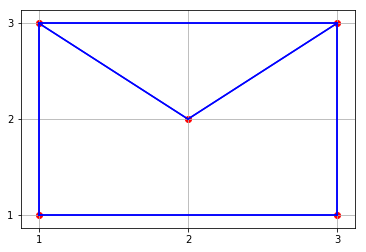

In [20]:
draw(Cn, A)

x, y, e = Cn.T
plt.scatter(x, y, color="red")

plt.xticks(np.arange(1,4))
plt.yticks(np.arange(1,4))
plt.grid(True)
plt.show()

In [21]:
T = np.array([
    [1,0, -2],
    [0,1,-2],
    [0,0, 1]
])
T

array([[ 1,  0, -2],
       [ 0,  1, -2],
       [ 0,  0,  1]])

In [22]:
T = np.array([
    [1,0,0],
    [0,-1,2],
    [0,0,1]
])
T

array([[ 1,  0,  0],
       [ 0, -1,  2],
       [ 0,  0,  1]])

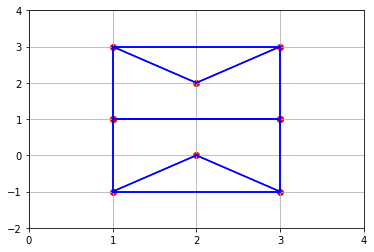

In [23]:
draw(Cn, A)
x, y, e = Cn.T
plt.scatter(x, y, color="red")

Cn_inv = np.matmul(Cn,T.T)
draw(Cn_inv, A)
x, y, e = Cn_inv.T
plt.scatter(x, y, color="red")

plt.xticks(np.arange(0,5))
plt.yticks(np.arange(-2,5))
plt.grid(True)
plt.show()

## Opgave 6

In [24]:
X = sp.Matrix([
    [1,1,0],
    [-1,1,0],
    [0,1,1],
]).T
X

⎡1  -1  0⎤
⎢        ⎥
⎢1  1   1⎥
⎢        ⎥
⎣0  0   1⎦

In [25]:
X.rref()[0]

⎡1  0  0⎤
⎢       ⎥
⎢0  1  0⎥
⎢       ⎥
⎣0  0  1⎦

Orgonality can be calculated by calculating inner products

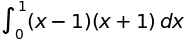

In [26]:
x = sp.symbols("x")

p1 = x+1
p2 = x-1
p3 = x**2+x

p1p2 = sp.Integral(p1*p2, (x, 0, 1))
p1p2

In [27]:
p1p2 = p1p2.doit()
p1p2

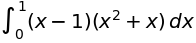

In [28]:
p2p3 = sp.Integral(p2*p3, (x, 0, 1))
p2p3

In [29]:
p2p3.doit()

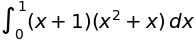

In [30]:
p1p3 = sp.Integral(p1*p3, (x, 0, 1))
p1p3

In [31]:
p1p3 = p1p3.doit()
p1p3

As all the inner products are non-zero the vectors are not orthogonal

In [32]:
v1 = p1
v1

In [33]:
p1p1 = sp.Integral(p1*p1, (x, 0, 1)).doit()

In [34]:
v2 = p2 - p1p2/p1p1*v1
v2

In [35]:
v2 = v2.doit()
v2

In [36]:
p2p2 = sp.Integral(p2*p2, (x, 0, 1)).doit()
p3v2 = sp.Integral(p3*v2, (x, 0, 1)).doit()
v2v2 = sp.Integral(v2*v2, (x, 0, 1)).doit()

In [37]:
v3 = p3 - p1p3/p1p1*v1 - p3v2/v2v2*v2
v3